## **Breast cancer analysis**

In [1]:
import numpy as np 
import pandas as pd 
import os 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape
X=df.drop("target",axis=1)
y=df.target

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [8]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.360,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123


we can clearly see that data are not at standard scale that will result in the some dimention to dominate the another.

In [9]:
from sklearn.preprocessing import StandardScaler
scalerr=StandardScaler()
X_train=scalerr.fit_transform(X_train)
X_test=scalerr.fit_transform(X_test)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_predict_test=knn.predict(X_test)
y_predict_train=knn.predict(X_train)

In [22]:
from sklearn.metrics import r2_score,accuracy_score,precision_score

r2score=r2_score(y_predict_test,y_test)
r2score2=r2_score(y_predict_train,y_train)
accuracy_test = accuracy_score(y_test, y_predict_test)
accuracy_train = accuracy_score(y_train, y_predict_train)
precision_test = precision_score(y_test, y_predict_test)
precision_train = precision_score(y_train, y_predict_train)

In [23]:
print("R2 score on test set:", r2score)
print("R2 score on train set:", r2score2)
print("Accuracy on test set:", accuracy_test)
print("Accuracy on train set:", accuracy_train)
print("Precision on test set:", precision_test)
print("Precision on train set:", precision_train)

R2 score on test set: 0.9238222519211493
R2 score on train set: 0.8951261419830693
Accuracy on test set: 0.9824561403508771
Accuracy on train set: 0.9758241758241758
Precision on test set: 1.0
Precision on train set: 0.9656357388316151


In [25]:
li=[]
for i in range(1,100):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train,y_train)
    pred=knn2.predict(X_test)
    acc=accuracy_score(pred,y_test)
    li.append(acc)
    print(f"At i = {i} accuracy is {acc}")

At i = 1 accuracy is 0.9649122807017544
At i = 2 accuracy is 0.9210526315789473
At i = 3 accuracy is 0.9912280701754386
At i = 4 accuracy is 0.9736842105263158
At i = 5 accuracy is 0.9824561403508771
At i = 6 accuracy is 0.9824561403508771
At i = 7 accuracy is 0.9912280701754386
At i = 8 accuracy is 0.9912280701754386
At i = 9 accuracy is 1.0
At i = 10 accuracy is 0.9912280701754386
At i = 11 accuracy is 0.9912280701754386
At i = 12 accuracy is 0.9824561403508771
At i = 13 accuracy is 1.0
At i = 14 accuracy is 0.9912280701754386
At i = 15 accuracy is 0.9912280701754386
At i = 16 accuracy is 0.9824561403508771
At i = 17 accuracy is 1.0
At i = 18 accuracy is 0.9824561403508771
At i = 19 accuracy is 0.9912280701754386
At i = 20 accuracy is 0.9912280701754386
At i = 21 accuracy is 0.9912280701754386
At i = 22 accuracy is 0.9912280701754386
At i = 23 accuracy is 0.9912280701754386
At i = 24 accuracy is 0.9912280701754386
At i = 25 accuracy is 0.9912280701754386
At i = 26 accuracy is 0.99122

c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Samee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


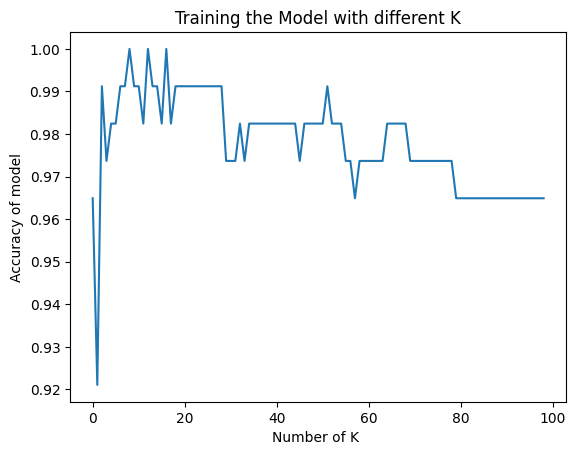

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.lineplot(li)
plt.xlabel("Number of K ")
plt.ylabel("Accuracy of model")
plt.title("Training the Model with different K")
plt.show()